# Import Required Libraries

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import statistics
import seaborn as sns

pd.set_option('display.max_colwidth', 200)

In [2]:
from numpy.random import seed
seed(1)

import tensorflow 
tensorflow.random.set_seed(2)

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# read CSV file
df = pd.read_csv("../input/depression/train_data_labelled.csv")

# Load Data

In [5]:
print(df.shape)

(12270, 2)


In [6]:
df.sample(15)

,Depression,tweets
7200,0,@HasbroWWFan @Mattel @WWEMattelRetro @MorganTyler86 Yeah i've seen Mattel's tweet it sucks they can't give out exact dates and locations
3679,1,I was diagnosed with depression years ago and sometimes it gets really tough even though I try really hard not to show signs of it
8612,0,"Por qué episodio de Lost vas? alta serie — La verdad que supero mis espectativas, me hizo llor... https://t.co/pLzfPW0rCU"
10201,0,I just wanna watch Broad City :(
11139,0,Tan solo serán 28 días de ese asqueroso mes ... en especial la primera semana .I.
7180,0,@Not_that_tweet @RJDownard @RealAlexJones I'm not a blind follower of anyone- where do you get your news?
11638,0,"Trump enjoys being pissed on, I think we shouldn't judge him on his fetish"
994,1,"I'm sorry but yes I have been diagnosed with severe depression and I have many reasons from my past for that, you don't just get over it!"
3000,1,"Today I finally saw my therapist and I was diagnosed with depression, eating disorder and personality disorder. I... http://t.co/Kf8LTVCv7I"
12249,1,@Sfetso_dj 😂😂😂 I won't even come then


In [7]:
# check distribution of the target variable
df['Depression'].value_counts()

1    6912
0    5358
Name: Depression, dtype: int64

## Text Cleaning

### Remove stopwords

In [8]:
stop_words= nltk.corpus.stopwords.words('english')

In [9]:
def remove_stopwords(row):
    row_words = row.split(' ')
    clean_words = [word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)
junk_words= ['i','I']
stop_words.extend(junk_words)

In [10]:

# Remove commonly used words also called as stopwords
df['tidy_tweets']= df['tweets'].apply(remove_stopwords)

### Stemming

In [11]:
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]



In [12]:
df['tidy_tweets'] = get_stemmed_text(df['tidy_tweets'])

### Lemmatization

In [13]:
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]



In [14]:
df['tidy_tweets'] = get_lemmatized_text(df['tidy_tweets'])

### Remove user handles

In [15]:
# function to remove user specified text pattern from the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [16]:
# remove twitter user handles (@username) from the tweets and store the tweets in a new variable called as 'tidy_tweets'
df['tidy_tweets'] = np.vectorize(remove_pattern)(df['tidy_tweets'], "@[\w]*") 
df.head()

,Depression,tweets,tidy_tweets
0,1,"Do I have AS?: I have been diagnosed with a few things, Depression (Confirmed to be wrong), AS and ADHD. I believe... http://bit.ly/cRcULN","Do as?: diagnos things, depress (confirm wrong), AS adhd. believe... http://bit.ly/crculn"
1,1,"Hate having friends doing med, so far this wk I have been diagnosed with having liver failure, depression, mild paranoia and chronic fatigue","hate friend med, far wk diagnos liver failure, depression, mild paranoia chronic fatigu"
2,1,"@bullyinguk I've been bullied for 6 years, its torn me apart, because of the bullies I have been diagnosed with depression and anxiety x","i'v bulli 6 years, torn apart, bulli diagnos depress anxieti x"
3,1,I have been diagnosed with depression before. #aboutme,diagnos depress before. #aboutm
4,1,Self Help Tips For Dealing W/depression & Mental Illness?: I have been diagnosed as bipolar & was on a medicine ... http://bit.ly/egfpkm,self help tip for deal w/depress & mental illness?: diagnos bipolar & medicin ... http://bit.ly/egfpkm


In [17]:
# remove hastags (#hashtag) from the tweets
df['tidy_tweets'] = np.vectorize(remove_pattern)(df['tidy_tweets'], "#[\w]*") 

In [18]:
# remove URLs from the tweets
df['tidy_tweets'] = df['tidy_tweets'].apply(lambda x: re.sub(r"http\S+", "", x))

In [19]:
df.head()

,Depression,tweets,tidy_tweets
0,1,"Do I have AS?: I have been diagnosed with a few things, Depression (Confirmed to be wrong), AS and ADHD. I believe... http://bit.ly/cRcULN","Do as?: diagnos things, depress (confirm wrong), AS adhd. believe..."
1,1,"Hate having friends doing med, so far this wk I have been diagnosed with having liver failure, depression, mild paranoia and chronic fatigue","hate friend med, far wk diagnos liver failure, depression, mild paranoia chronic fatigu"
2,1,"@bullyinguk I've been bullied for 6 years, its torn me apart, because of the bullies I have been diagnosed with depression and anxiety x","i'v bulli 6 years, torn apart, bulli diagnos depress anxieti x"
3,1,I have been diagnosed with depression before. #aboutme,diagnos depress before.
4,1,Self Help Tips For Dealing W/depression & Mental Illness?: I have been diagnosed as bipolar & was on a medicine ... http://bit.ly/egfpkm,self help tip for deal w/depress & mental illness?: diagnos bipolar & medicin ...


In [20]:
# remove all the characters, symbols and numbers other than alphabets
df['tidy_tweets'] = df['tidy_tweets'].str.lower()
df['tidy_tweets'] = df['tidy_tweets'].str.replace("[^a-z]", " ")
df.sample(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Depression,tweets,tidy_tweets
6431,0,Bro slumped 😴,bro slump
11476,0,@TeamItik ate alam mo yan!!! Itang kita mo nawala pose ko. Lol\n\n#FoolishLoveMovie,ate alam mo yan itang kita mo nawala pose ko lol
7121,0,I liked a @YouTube video from @shadowshak_ https://t.co/dRPN0XnVDH Digimon World - Episode 1 ''File City &amp; Agumon'' (100 Prosperity,like video digimon world episod file citi amp agumon prosper
3241,1,"Many times people don't know how to talk to those with depression. I know, as I was diagnosed with depression,... http://t.co/3iTq4iWTRr",mani time peopl know talk depression know diagnos depression
10188,0,"@sycylia6_ Umarła ich Polska umarł ich Bauman,Moczar,Radkiewicz i inni bandyci.Jak żyć panie Szechter ? Jak żyć ?",umar a ich polska umar ich bauman moczar radkiewicz inni bandyci jak y pani szechter jak y
4524,1,at 13 I was diagnosed with anxiety and depression. today I'm not ashamed to talk about that or my recovery. #WorldMentalHealthDay,diagnos anxieti depression today i m asham talk recovery
9683,0,"If you go, I go. Hooman! https://t.co/6Oj5lWElIL vía @9GAG",if go go hooman v a
10703,0,"@JessupMiller @BrookeRowden @BlakeAnderson I have been 4 times n it can be dusty, but with the dust is a lot of carbon monoxide why everyone",time n dusty dust lot carbon monoxid everyon
4436,1,9 Things I Wish I’d Known About #Depression Before I Was Diagnosed http://t.co/fcmnT35cPx by @rachelkellynet http://t.co/W2j6ogYtek,thing wish i d known about befor wa diagnos
1375,1,"I was diagnosed with depression when I was 13. And still nobody understands how it effects me physically, mentally, and emotionally.",diagnos depress and still nobodi understand effect physically mentally emotionally


After the above cleaning steps, some of the tweets might have got removed entirely. For such cases, we will have to completely remove those rows from our dataset.

In [21]:
# replace empty strings with NaN values
df['tidy_tweets'].replace('', np.nan, inplace=True)

In [22]:
# dimensions of data before removing rows with no text
df.shape

(12270, 3)

In [23]:
# drop rows with NaN in the column 'tidy_tweets'
df.dropna(subset=['tidy_tweets'], inplace=True)

In [24]:
# dimensions of data after removing rows with no text
df.shape

(12269, 3)

In [25]:
### Lot of words with length 1 which are insignificant. Most words of length 1 doesn't have meaning

In [26]:
def words_gt_1(old_string):
    

    return(' '.join([w for w in old_string.split() if len(w)>1]))

In [27]:
df['tidy_tweets'] = df['tidy_tweets'].apply(words_gt_1)

# Statistical Analysis

### Average tweet length

In [28]:
def length_of_string(string):
    

    return(len(string.split()))

In [29]:
df['len_tidy_tweets'] = df['tidy_tweets'].apply(length_of_string)

In [30]:
df.head()

,Depression,tweets,tidy_tweets,len_tidy_tweets
0,1,"Do I have AS?: I have been diagnosed with a few things, Depression (Confirmed to be wrong), AS and ADHD. I believe... http://bit.ly/cRcULN",do as diagnos things depress confirm wrong as adhd believe,10
1,1,"Hate having friends doing med, so far this wk I have been diagnosed with having liver failure, depression, mild paranoia and chronic fatigue",hate friend med far wk diagnos liver failure depression mild paranoia chronic fatigu,13
2,1,"@bullyinguk I've been bullied for 6 years, its torn me apart, because of the bullies I have been diagnosed with depression and anxiety x",bulli years torn apart bulli diagnos depress anxieti,8
3,1,I have been diagnosed with depression before. #aboutme,diagnos depress before,3
4,1,Self Help Tips For Dealing W/depression & Mental Illness?: I have been diagnosed as bipolar & was on a medicine ... http://bit.ly/egfpkm,self help tip for deal depress mental illness diagnos bipolar medicin,11


###  aim : Is the average length of string same for both depression and non-depression tweets?

In [31]:
depression_true_tweet_len = df[df['Depression'] == 1]['len_tidy_tweets']

In [32]:
depression_false_tweet_len = df[df['Depression'] == 0]['len_tidy_tweets']

### Distribution depression true vs depression false

<AxesSubplot:xlabel='len_tidy_tweets', ylabel='Density'>

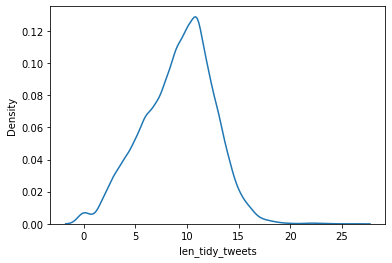

In [33]:
sns.kdeplot(depression_true_tweet_len)

In [34]:
from PIL import Image
import io
import seaborn as sns
import matplotlib.pyplot as plt

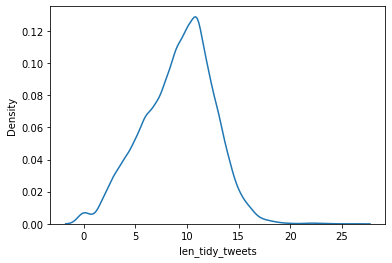

In [35]:
 fig, ax = plt.subplots(figsize = (6,4)) #solved by add this line 
 ax = sns.kdeplot(depression_true_tweet_len)

In [36]:
png1 = io.BytesIO()
fig.savefig(png1, format="png")

In [37]:
png2 = Image.open(png1)

In [38]:
png2.save("stat1.tiff")
png1.close()

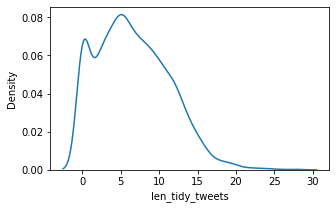

In [39]:
 fig, ax = plt.subplots(figsize = (5,3)) #solved by add this line 
ax = sns.kdeplot(depression_false_tweet_len)

In [40]:
png2 = io.BytesIO()
fig.savefig(png2, format="png")

In [41]:
png3 = Image.open(png2)

In [42]:
png3 = Image.open(png2)

In [43]:
png3.save("stat2.tiff")
png2.close()

In [44]:
print(statistics.mean(depression_true_tweet_len),statistics.mean(depression_false_tweet_len))

9.170452901172045 6.639604329973871


* Average Length of a tweet for depression is True is 9.17 and for depression False is 6.63 words. Is this difference statistically significant?

### T-Test independent

In [45]:
from scipy.stats import ttest_ind

In [46]:
stat, p = ttest_ind(depression_true_tweet_len, depression_false_tweet_len)

In [47]:
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=34.749, p=0.000


In [48]:
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


* Inference from ttest independent is, The distribution for the tweet length for both depressed ones and non depressed ones are different at 95% significant level

### T TEST

* A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

* The null hypothesis (H0) is that the true difference between these group means is zero.
* The alternate hypothesis (Ha) is that the true difference is different from zero.


*** Source: https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%2Dtest%20is%20a%20statistical%20test%20that%20compares%20the,means%20is%20different%20from%20zero.

# WordClouds

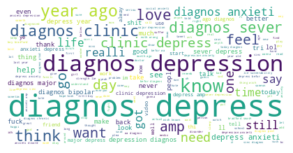

In [49]:

plt.figure(figsize = (5,4))
wc = WordCloud(background_color='white', max_font_size=50 ).generate(' '.join(df['tidy_tweets']))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()



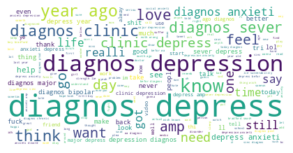

In [50]:
fig, ax = plt.subplots(figsize = (5,4)) #solved by add this line 
ax = plt.axis("off")
ax = plt.imshow(wc, interpolation='bilinear')


In [51]:
png4 = io.BytesIO()
fig.savefig(png4, format="png")

In [52]:
png5 = Image.open(png4)

In [53]:
png5.save("wc1.tiff")
png4.close()

### Depression True WordCloud

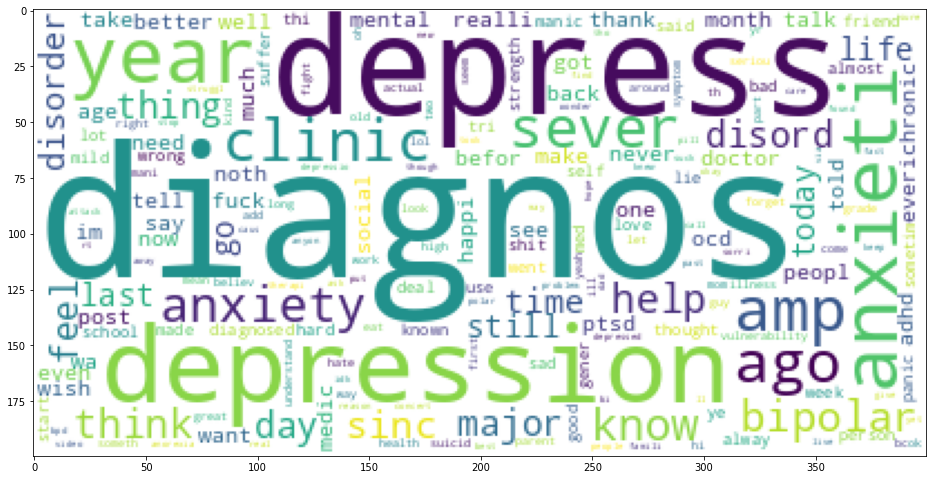

In [54]:

plt.figure(figsize = (16,10))
depression_true = df[df['Depression'] == 1]
wc = WordCloud(background_color='white', collocations=False ).generate(' '.join(depression_true['tidy_tweets']))
plt.imshow(wc)

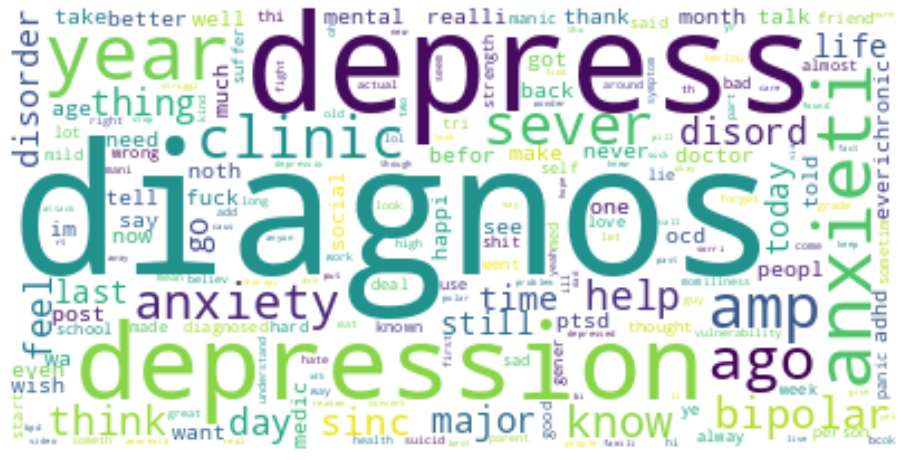

In [55]:
fig, ax = plt.subplots(figsize = (16,10)) #solved by add this line 
ax = plt.axis("off")
ax = plt.imshow(wc, interpolation='bilinear')
png3 = io.BytesIO()
fig.savefig(png3, format="png")
png4 = Image.open(png3)
png4.save("wc1.tiff")
png3.close()


### Depression False WordCloud

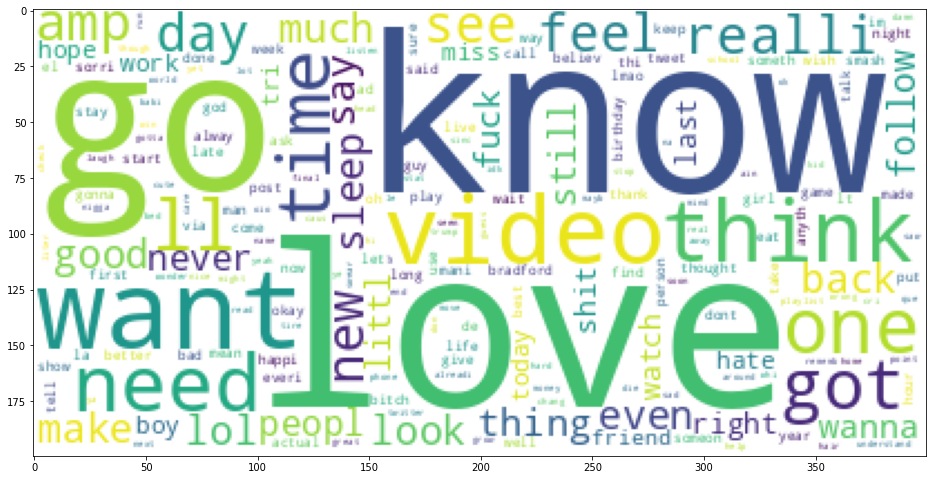

In [56]:

plt.figure(figsize = (16,10))
depression_false = df[df['Depression'] == 0]
wc = WordCloud(background_color='white', collocations=False).generate(' '.join(depression_false['tidy_tweets']))
plt.imshow(wc)

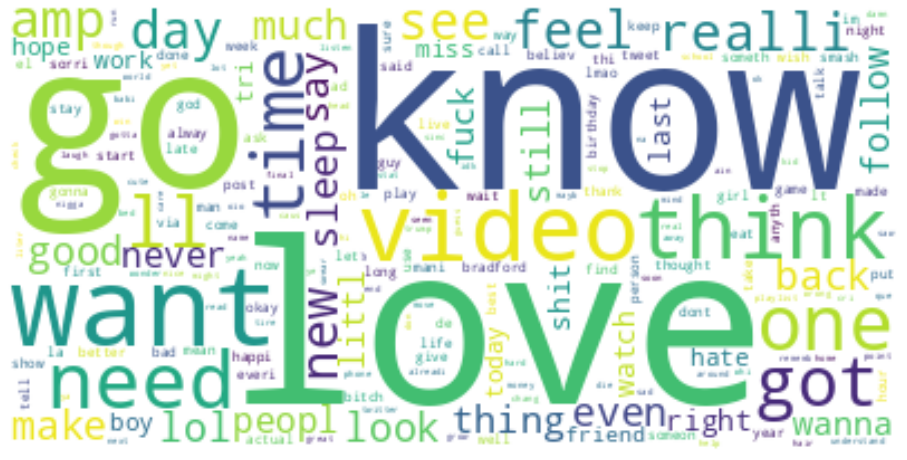

In [57]:
fig, ax = plt.subplots(figsize = (16,10)) #solved by add this line 
ax = plt.axis("off")
ax = plt.imshow(wc,  interpolation='bilinear')
png3 = io.BytesIO()
fig.savefig(png3, format="png")
png4 = Image.open(png3)
png4.save("wc2.tiff")
png3.close()

In [58]:
# add a new variable 'target', 1 for tweets with depression and 0 elsewhere
df['target'] = np.where(df['Depression'] == True,1,0)

In [59]:
# drop duplicate rows, if any
df.drop_duplicates(inplace=True)
df.shape

(12268, 5)

# Text Exploration

In [60]:
# function to visualize words/tokens with their frequencies
def freq_words(x, terms,output_tiff_name):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
  
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
    # selecting top most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(11,4))
    ax = sns.barplot(data=d, x= "count", y = "word")
    ax.set(ylabel = 'Word')
    png3 = io.BytesIO()
    plt.savefig(png3, format="png")
    png4 = Image.open(png3)
    png4.save(output_tiff_name)
    #png3.close()
    plt.show()

# Word Frequency

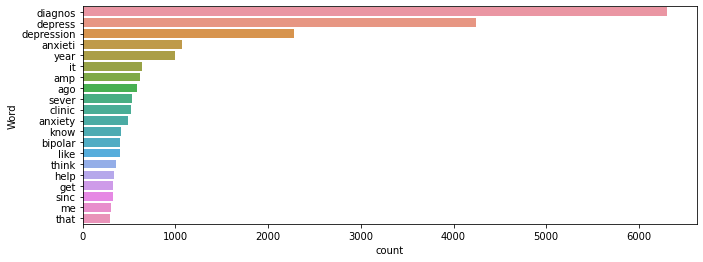

In [61]:
# Visualize top frequent words in tweets with depression
freq_words(df[df['Depression'] == True]['tidy_tweets'],20,'depressed_freq.tiff')

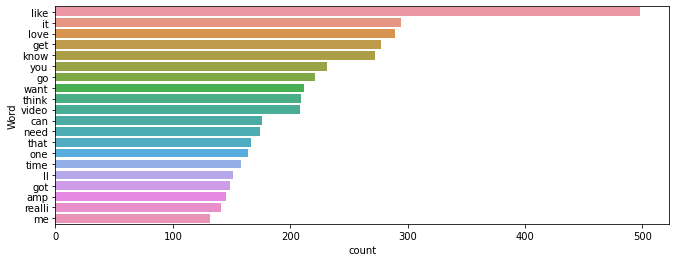

In [62]:
# Visualize top frequent words in tweets with depression
freq_words(df[df['Depression'] == False]['tidy_tweets'],20,'Non_depressed_freq.tiff')

# Text Feature Creation

In [63]:
# converting text column and target column into lists
target = df['target'].tolist()
text = df['tidy_tweets'].tolist()

In [64]:
from sklearn.model_selection import train_test_split

# split data into train-set and validation-set
# model will be trained on the train-set and it will be evaluated on the validation-set
x_tr, x_val, y_tr, y_val = train_test_split(text, target, test_size=0.3, random_state=0, shuffle=True)

In [65]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

#prepare a tokenizer
x_tokenizer = Tokenizer() 

x_tokenizer.fit_on_texts(x_tr)

In [66]:
# vocabulary size (count of distinct tokens in the train-set)
len(x_tokenizer.word_index)

9418

Text(0, 0.5, 'Counts')

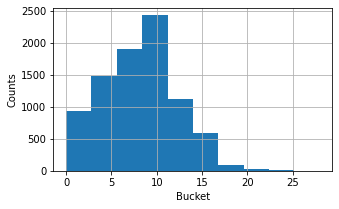

In [68]:
# get lengths of all the tweets in the train-set (x_tr)
text_len = [len(t.split()) for t in x_tr]



# plot the lengths
series_text_len = pd.Series(text_len)
series_text_len.hist(figsize = (5,3)).plot()
plt.xlabel("Bucket")
plt.ylabel("Counts")


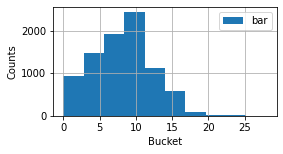

In [69]:
fig, ax = plt.subplots() #solved by add this line 
ax = pd.Series(text_len).hist(figsize = (4,2)).plot()
png3 = io.BytesIO()
plt.xlabel("Bucket")
plt.ylabel("Counts")
plt.legend(["bar"])
fig.savefig(png3, format="png", bbox_inches='tight')
png4 = Image.open(png3)
png4.save("text.tiff")
png3.close()

In the above histogram, we can see that most of the tweets in the train-set have length (number of words) <= 10. So, we can use 10 as the standard fixed length for all the text sequences

In [70]:
# maximum sequence length allowed
max_len = 25

#convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

#padding up with zero 
x_tr_seq = pad_sequences(x_tr_seq,  padding='post', maxlen=max_len)
x_val_seq = pad_sequences(x_val_seq, padding='post', maxlen=max_len)

Since we are padding the sequences with zeros, we must increment the vocabulary size by one.

In [71]:
# no. of distinct words
x_voc_size = len(x_tokenizer.word_index) + 1
x_voc_size

9419

In [72]:
x_val_seq.shape

(3681, 25)

In [73]:
x_test_seq = x_val_seq[2000:]
y_test = y_val[2000:]

x_val_seq = x_val_seq[:2000]
y_val = y_val[:2000]

# Model Building - RNN

In [74]:
import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *

### Define Model Architecture

In [75]:
#sequential model
model = Sequential()

#embedding layer
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

#rnn layer
model.add(SimpleRNN(128))

#dense layer
model.add(Dense(64,activation='relu')) 

#dropout layer
model.add(Dropout(0.4))

#output layer
model.add(Dense(1,activation='tanh'))

2021-12-22 08:01:20.246428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-22 08:01:20.345042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-22 08:01:20.345787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-22 08:01:20.347324: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            470950    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               22912     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 502,183
Trainable params: 502,183
Non-trainable params: 0
_________________________________________________________________


In [77]:
#define optimizer and loss
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [78]:
# checkpoint to save best model during training
#mc = ModelCheckpoint("weights.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

### Train the Model



In [79]:
#train the model 
history = model.fit(x_tr_seq, np.array(y_tr), batch_size=256, epochs=50, verbose=1, 
          validation_data=(x_val_seq, np.array(y_val)))

2021-12-22 08:01:23.211166: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
34/34 [==============================] - 4s 63ms/step - loss: 0.7070 - accuracy: 0.7175 - val_loss: 0.3658 - val_accuracy: 0.9325
Epoch 2/50
34/34 [==============================] - 2s 59ms/step - loss: 0.2689 - accuracy: 0.9332 - val_loss: 0.3007 - val_accuracy: 0.9300
Epoch 3/50
34/34 [==============================] - 1s 42ms/step - loss: 0.1907 - accuracy: 0.9503 - val_loss: 0.3944 - val_accuracy: 0.9260
Epoch 4/50
34/34 [==============================] - 1s 44ms/step - loss: 0.1548 - accuracy: 0.9568 - val_loss: 0.3752 - val_accuracy: 0.9195
Epoch 5/50
34/34 [==============================] - 1s 43ms/step - loss: 0.1234 - accuracy: 0.9611 - val_loss: 0.4507 - val_accuracy: 0.9185
Epoch 6/50
34/34 [==============================] - 1s 41ms/step - loss: 0.1287 - accuracy: 0.9617 - val_loss: 0.4980 - val_accuracy: 0.9145
Epoch 7/50
34/34 [==============================] - 2s 55ms/step - loss: 0.1086 - accuracy: 0.9616 - val_loss: 0.4839 - val_accuracy: 0.9185
Epoch 8/50
34

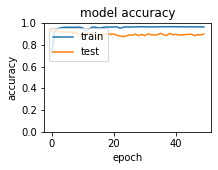

In [80]:
# visualize model's performance on both the train-set and the validation-set
plt.figure(figsize = (3,2))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

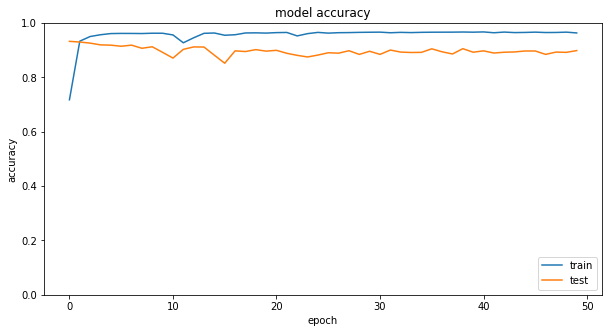

In [81]:
fig, ax = plt.subplots(figsize = (10,5)) #solved by add this line 

ax = plt.plot(history.history['accuracy'])
ax = plt.plot(history.history['val_accuracy'])
ax = plt.title('model accuracy')
ax = plt.ylabel('accuracy')
ax = plt.xlabel('epoch')
ax = plt.ylim([0, 1])
ax = plt.legend(['train', 'test'], loc='lower right')
png3 = io.BytesIO()
fig.savefig(png3, format="png")
png4 = Image.open(png3)
png4.save("rnnaccuracy.tiff")
png3.close()

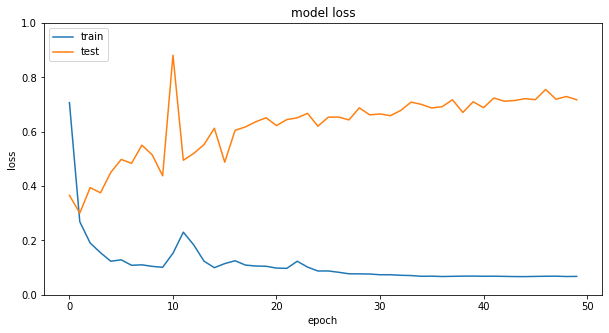

In [82]:
# visualize model's performance on both the train-set and the validation-set
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

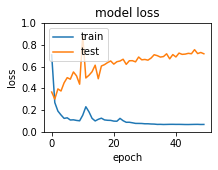

In [83]:
fig, ax = plt.subplots(figsize = (3,2)) #solved by add this line 
ax = plt.plot(history.history['loss'])
ax = plt.plot(history.history['val_loss'])
ax = plt.title('model loss')
ax = plt.ylabel('loss')
ax = plt.xlabel('epoch')
ax = plt.ylim([0, 1])
ax = plt.legend(['train', 'test'], loc='upper left')
png3 = io.BytesIO()
fig.savefig(png3, format="png")
png4 = Image.open(png3)
png4.save("rnnloss.tiff")
png3.close()

# Model Predictions 

Load the best model weights and now, the model is ready for the predictions

In [84]:
# load weights into new model
#model.load_weights("weights.best.hdf5")


#predict probabilities
pred_prob = model.predict(x_test_seq)

The predictions are in terms of probabilities. Hence we need to have a threshold value to convert these probabilities to 0 or 1.

Let's define a function that takes a threshold value and uses it to convert probabilities into 1 or 0.

In [86]:
# convert probabilities into classes or tags based on a threshold value
def classify(pred_prob,thresh):
    y_pred_seq = []

    for i in pred_prob:
        temp=[]
        for j in i:
            if j>=thresh:
                temp.append(1)
            else:
                temp.append(0)
            y_pred_seq.append(temp)

    return y_pred_seq

# Model Evaluation

In [87]:
from sklearn import metrics

In [88]:
#predictions for optimal threshold
y_pred_seq = classify(pred_prob,0.5)
y_pred = np.array(y_pred_seq).ravel()

### F1 Score, Recall and Precision 

In [89]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       740
           1       0.91      0.93      0.92       941

    accuracy                           0.91      1681
   macro avg       0.91      0.91      0.91      1681
weighted avg       0.91      0.91      0.91      1681



### Accuracy

In [90]:
metrics.accuracy_score(y_test,y_pred)

0.9119571683521713

In [91]:
confusion = metrics.confusion_matrix(y_test,y_pred)        ###Model evaluation
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1 = metrics.f1_score(y_test,y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix \n{} '.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix 
[[658  82]
 [ 66 875]] 
precision is 0.9143155694879833
recall is  0.9298618490967057
F1 score 0.922023182297155
specificity is 0.8891891891891892


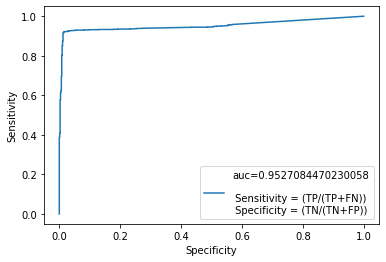

In [126]:
Y_pred_proba = model.predict(x_test_seq)
fpr, tpr, _ = metrics.roc_curve(y_test, Y_pred_proba)
auc = metrics.roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc)+"\n\n Sensitivity = (TP/(TP+FN)) \n Specificity = (TN/(TN+FP))")
plt.ylabel('Sensitivity')
plt.xlabel('Specificity')
plt.legend(loc=4)
plt.show()

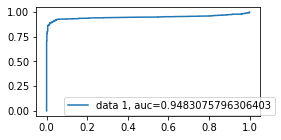

In [93]:
fig, ax = plt.subplots(figsize = (4,2)) #solved by add this line 
ax = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
ax = plt.legend(bbox_to_anchor =(0.10, 0.22))
png3 = io.BytesIO()
fig.savefig(png3, format="png")
png4 = Image.open(png3)
png4.save("rnnauc.tiff")
png3.close()